In [1]:
from nilearn.image import high_variance_confounds
from nilearn import image, plotting
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

/home/sshankar/env/fastsrm/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# Task of interest
task = 'raiders'

In [4]:
run = 1
filepattern = 'wrdc*run-' + str(run).zfill(2) + '*.nii.gz'

In [5]:
# Now create a list of movie session files 
movie_dir = os.path.join('..', task, 'derivatives/')
subs = sorted(glob.glob(movie_dir + 'sub*'))
confound_file = 'masked_imgs_confound_run' +  str(run).zfill(2) + '.npy'

In [ ]:
# Calculate high variance confounds for the data files
for s, sub in enumerate(subs):
    if os.path.isdir(sub):
        sess = sorted(glob.glob(sub + '/ses*'))
        for si, ses in enumerate(sess):
            movie_imgs = sorted(glob.glob(ses + '/' + filepattern))
            for mi, movie_img in enumerate(movie_imgs):
                if os.path.isfile(movie_img) and not os.path.isfile(os.path.join(ses, confound_file)):
                    movie_imgs_confounds = high_variance_confounds(movie_img)
                    np.save(os.path.join(ses, confound_file), movie_imgs_confounds)

In [20]:
# Load the confound files
confounds = []
confound_pattern = '*_confound_*.npy'
for s, sub in enumerate(subs):
    sess = sorted(glob.glob(sub + '/ses*'))
    for i, ses in enumerate(sess):
        files = sorted(glob.glob(ses + '/' + confound_pattern))
        for fi, file in enumerate(files):
            confounds.append(np.load(file, allow_pickle=True))
    if s > 0:
        break

In [21]:
print(confounds[0].shape, confounds[1].shape, confounds[2].shape, confounds[3].shape, confounds[4].shape, confounds[5].shape,
      confounds[6].shape, confounds[7].shape, confounds[8].shape, confounds[9].shape, confounds[10].shape, confounds[11].shape)

(374, 5) (297, 5) (314, 5) (379, 5) (347, 5) (346, 5) (350, 5) (353, 5) (281, 5) (211, 5) (375, 5) (297, 5)


In [7]:
# The confound files for a particular session should
# all have the same length, irrespective of subject
# Create a list of confound array lengths
nsub = len(subs)
clen = np.zeros((nsub,12,5))
for si in range(nsub):
    for sesi in range(12):
        for c in range(5):
            clen[si,sesi,c] = len(confounds[si*12+sesi][:,c])

In [8]:
# Plot the lengths of the confound arrays
si = 0
for i in range(12):
    print(clen[9,i], '\t', clen[8,i], '\t', clen[2,i])

[374. 374. 374. 374. 374.] 	 [374. 374. 374. 374. 374.] 	 [374. 374. 374. 374. 374.]
[297. 297. 297. 297. 297.] 	 [297. 297. 297. 297. 297.] 	 [297. 297. 297. 297. 297.]
[314. 314. 314. 314. 314.] 	 [314. 314. 314. 314. 314.] 	 [314. 314. 314. 314. 314.]
[379. 379. 379. 379. 379.] 	 [379. 379. 379. 379. 379.] 	 [379. 379. 379. 379. 379.]
[347. 347. 347. 347. 347.] 	 [347. 347. 347. 347. 347.] 	 [347. 347. 347. 347. 347.]
[346. 346. 346. 346. 346.] 	 [346. 346. 346. 346. 346.] 	 [346. 346. 346. 346. 346.]
[350. 350. 350. 350. 350.] 	 [350. 350. 350. 350. 350.] 	 [350. 350. 350. 350. 350.]
[353. 353. 353. 353. 353.] 	 [353. 353. 353. 353. 353.] 	 [353. 353. 353. 353. 353.]
[281. 281. 281. 281. 281.] 	 [281. 281. 281. 281. 281.] 	 [281. 281. 281. 281. 281.]
[211. 211. 211. 211. 211.] 	 [211. 211. 211. 211. 211.] 	 [211. 211. 211. 211. 211.]
[375. 375. 375. 375. 375.] 	 [375. 375. 375. 375. 375.] 	 [375. 375. 375. 375. 375.]
[297. 297. 297. 297. 297.] 	 [297. 297. 297. 297. 297.] 	 [297. 2

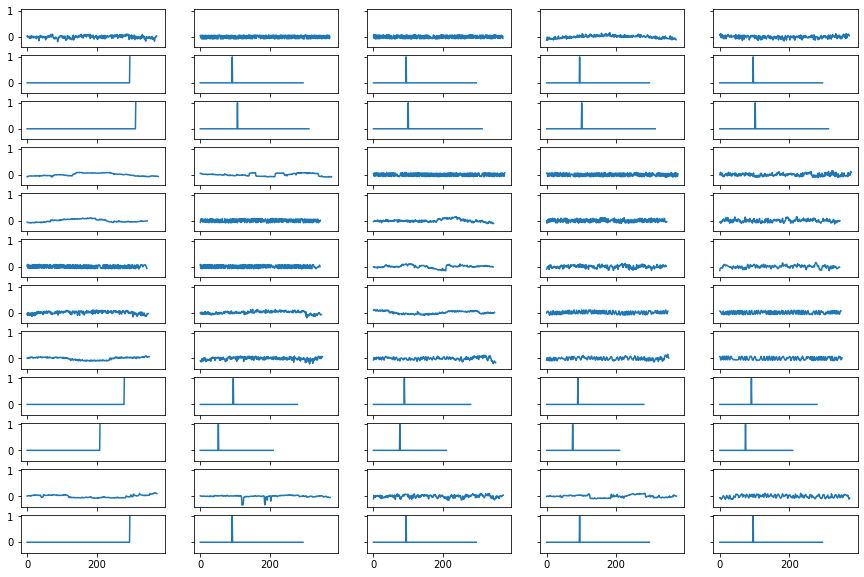

In [9]:
fig, axs = plt.subplots(12, 5, figsize=(15,10), sharex=True, sharey=True)
si = 0
for sesi in range(12):
    for c in range(5):
        axs[sesi,c].plot(confounds[si*12+sesi][:,c])

In [10]:
# Load the confound files computed from raw data
raw_conf = []
confound_pattern = '*confound*.npy'

raw_conf_files = '/home/sshankar/raiders/derivatives/confounds/raw_data/sub-01/ses-16/'
files = sorted(glob.glob(raw_conf_files + confound_pattern))
for fi, file in enumerate(files):
    raw_conf.append(np.load(file, allow_pickle=True))
    
raw_conf_files = '/home/sshankar/raiders/derivatives/confounds/raw_data/sub-01/ses-17/'
files = sorted(glob.glob(raw_conf_files + confound_pattern))
for fi, file in enumerate(files):
    raw_conf.append(np.load(file, allow_pickle=True))

In [23]:
print(confounds[0].shape, confounds[1].shape, confounds[2].shape, confounds[3].shape, confounds[4].shape, confounds[5].shape,
      confounds[6].shape, confounds[7].shape, confounds[8].shape, confounds[9].shape, confounds[10].shape, confounds[11].shape)

(374, 5) (297, 5) (314, 5) (379, 5) (347, 5) (346, 5) (350, 5) (353, 5) (281, 5) (211, 5) (375, 5) (297, 5)


In [24]:
print(raw_conf[3].shape, raw_conf[4].shape, raw_conf[5].shape, raw_conf[0].shape, raw_conf[1].shape, raw_conf[2].shape,
      raw_conf[8].shape, raw_conf[9].shape, raw_conf[10].shape, raw_conf[11].shape, raw_conf[6].shape, raw_conf[7].shape)

(375, 5) (374, 5) (297, 5) (379, 5) (347, 5) (346, 5) (211, 5) (375, 5) (297, 5) (314, 5) (314, 5) (281, 5)


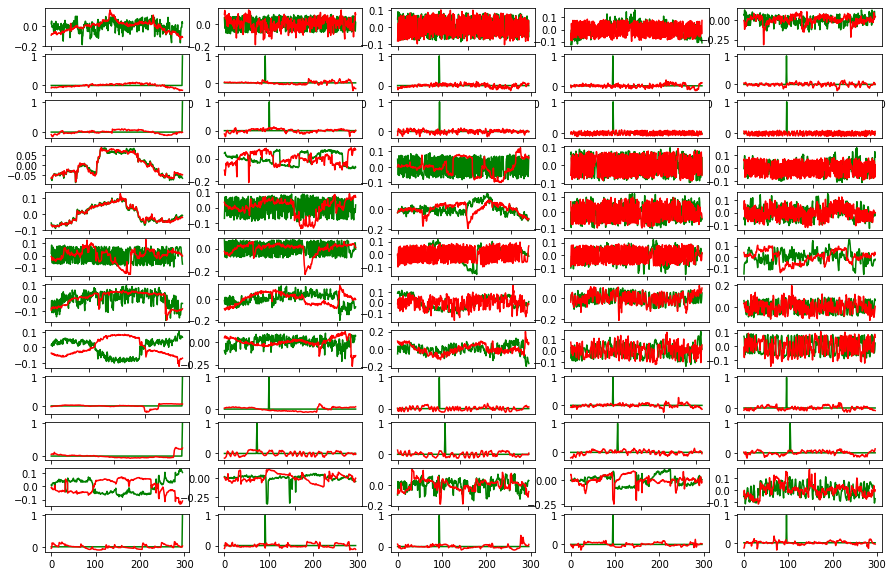

In [26]:
fig, axs = plt.subplots(12, 5, figsize=(15,10))
si = 0
raw_order = [4, 5, 6, 0, 1, 2, 12, 13, 7, 8, 9, 10]
for sesi in range(12):
    for c in range(5):
        axs[sesi,c].plot(confounds[si*12+sesi][:,c], 'g')
        axs[sesi,c].plot(raw_conf[raw_order[sesi]][:,c], 'r')

In [25]:
len(raw_conf)

14

In [27]:
# Load the confound files computed from realigned data
realign_conf = []
confound_pattern = '*confound*.npy'

realign_conf_files = '/home/sshankar/raiders/derivatives/confounds/realigned/sub-01/ses-16/'
files = sorted(glob.glob(realign_conf_files + confound_pattern))
for fi, file in enumerate(files):
    realign_conf.append(np.load(file, allow_pickle=True))
    
realign_conf_files = '/home/sshankar/raiders/derivatives/confounds/realigned/sub-01/ses-17/'
files = sorted(glob.glob(realign_conf_files + confound_pattern))
for fi, file in enumerate(files):
    realign_conf.append(np.load(file, allow_pickle=True))

In [30]:
print(realign_conf[3].shape, realign_conf[4].shape, realign_conf[5].shape, realign_conf[0].shape, realign_conf[1].shape, realign_conf[2].shape,
      realign_conf[10].shape, realign_conf[11].shape, realign_conf[6].shape, realign_conf[7].shape, realign_conf[8].shape, realign_conf[9].shape)

(374, 5) (297, 5) (314, 5) (379, 5) (347, 5) (346, 5) (350, 5) (353, 5) (281, 5) (211, 5) (375, 5) (297, 5)


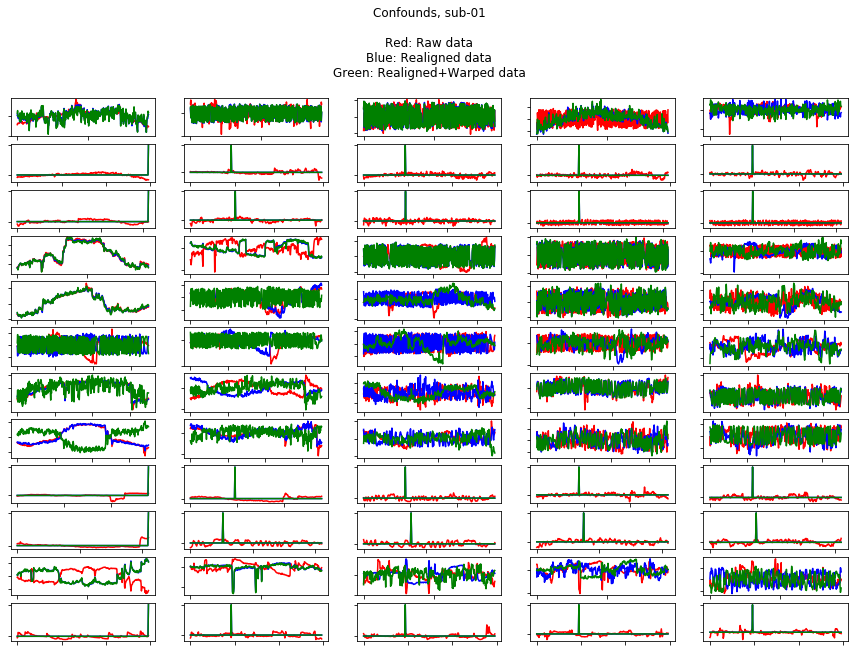

In [73]:
fig, axs = plt.subplots(12, 5, figsize=(15,10))
axs[0,2].set_title('Confounds, sub-01\n\nRed: Raw data\nBlue: Realigned data\nGreen: Realigned+Warped data\n')
si = 0
raw_order = [4, 5, 6, 0, 1, 2, 12, 13, 7, 8, 9, 10]
raw_realign = [3, 4, 5, 0, 1, 2, 10, 11, 6, 7, 8, 9]
for sesi in range(12):
    for c in range(5):
        axs[sesi,c].plot(raw_conf[raw_order[sesi]][:,c], 'r')
        axs[sesi,c].plot(realign_conf[raw_realign[sesi]][:,c], 'b')
        axs[sesi,c].plot(confounds[si*12+sesi][:,c], 'g')
        axs[sesi,c].set_xticklabels(labels=[])
        axs[sesi,c].set_yticklabels(labels=[])

In [74]:
fig.savefig(os.path.join('/home/sshankar/raiders/derivatives/confounds','raw_realigned_warped.pdf'), format='pdf', transparent=False)

In [50]:
# Load the motion parameters files
motion = []
motion_pattern = 'rp*.txt'

motion_dir = os.path.join('..', task, '3mm/')
mot_subs = sorted(glob.glob(motion_dir + 'sub*'))

for s, sub in enumerate(mot_subs):
    sess = sorted(glob.glob(sub + '/ses*'))
    for i, ses in enumerate(sess):
        files = sorted(glob.glob(ses + '/' + motion_pattern))
        for fi, file in enumerate(files):
            motion.append(np.loadtxt(file))

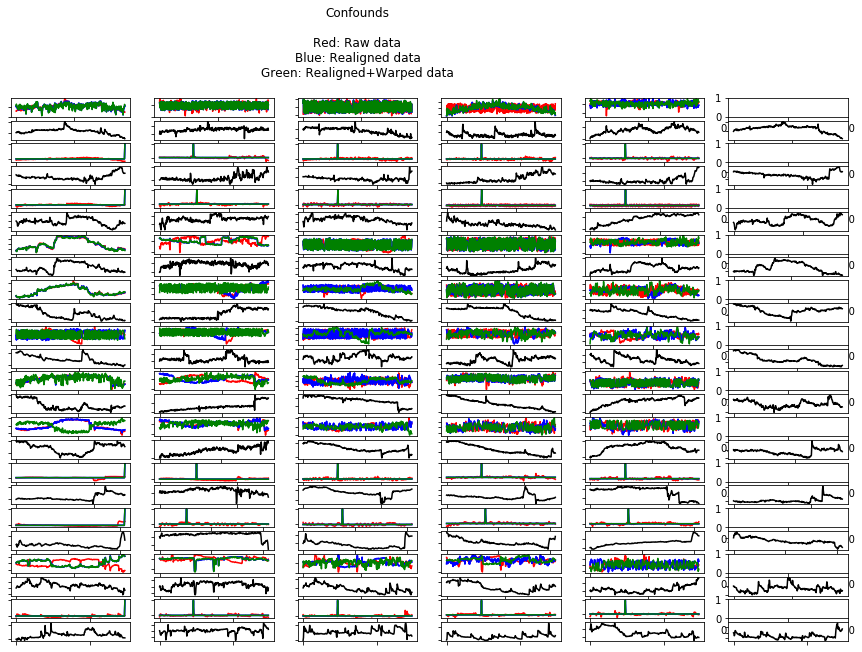

In [70]:
fig, axs = plt.subplots(12*2, 6, figsize=(15,10))
axs[0,2].set_title('Confounds\n\nRed: Raw data\nBlue: Realigned data\nGreen: Realigned+Warped data\n')
si = 0
raw_order = [4, 5, 6, 0, 1, 2, 12, 13, 7, 8, 9, 10]
realign_order = [3, 4, 5, 0, 1, 2, 10, 11, 6, 7, 8, 9]
for sesi in range(12):
    for c in range(5):
        axs[sesi*2,c].plot(raw_conf[raw_order[sesi]][:,c], 'r')
        axs[sesi*2,c].plot(realign_conf[realign_order[sesi]][:,c], 'b')
        axs[sesi*2,c].plot(realign_conf[realign_order[sesi]][:,c], 'b')
        axs[sesi*2,c].plot(confounds[si*12+sesi][:,c], 'g')
        axs[sesi*2,c].set_xticklabels(labels=[])
        axs[sesi*2,c].set_yticklabels(labels=[])

for sesi in range(12):
    for c in range(6):
        axs[sesi*2+1,c].plot(motion[realign_order[sesi]][:,c], 'k')
        axs[sesi*2+1,c].set_xticklabels(labels=[])
        axs[sesi*2+1,c].set_yticklabels(labels=[])

In [72]:
fig.savefig(os.path.join('/home/sshankar/raiders/derivatives/confounds','raw_realigned_warped_motion.pdf'), format='pdf', transparent=False)

In [75]:
mot_subs

['../raiders/3mm/sub-01',
 '../raiders/3mm/sub-04',
 '../raiders/3mm/sub-05',
 '../raiders/3mm/sub-06',
 '../raiders/3mm/sub-07',
 '../raiders/3mm/sub-09',
 '../raiders/3mm/sub-11',
 '../raiders/3mm/sub-12',
 '../raiders/3mm/sub-13',
 '../raiders/3mm/sub-14',
 '../raiders/3mm/sub-15']